# 1. Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from sklearn.metrics import classification_report

# 2. Dataset Visualization

In [2]:
diabetes = pd.read_csv("diabetes.csv")
dataset = diabetes

In [3]:
profile = ProfileReport(dataset, title="Diabetes Report", explorative=True)

In [4]:
profile

In [5]:
profile.to_widgets()

In [6]:
profile.to_file("diabetes_report.html")

# 3. Preprocessing

In [7]:
from scipy.stats import shapiro
stat, p = shapiro(dataset['BloodPressure'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.819, p=0.000


## 3.1 Missing (zero) values

## 3.1.1 Blood Pressure

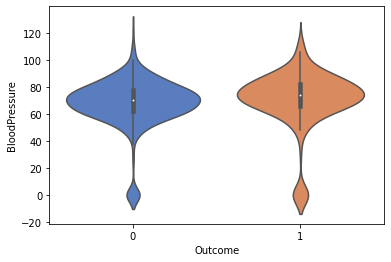

In [8]:
ax = sns.violinplot(x='Outcome', y='BloodPressure', data=dataset, palette='muted', split=False)

Replacing the zero-values for Blood Pressure

In [9]:
df1 = dataset.loc[dataset['Outcome'] == 1]
df2 = dataset.loc[dataset['Outcome'] == 0]
df1 = df1.replace({'BloodPressure':0}, np.median(df1['BloodPressure']))
df2 = df2.replace({'BloodPressure':0}, np.median(df2['BloodPressure']))
dataframe = [df1, df2]
dataset = pd.concat(dataframe)

## 3.1.2 BMI

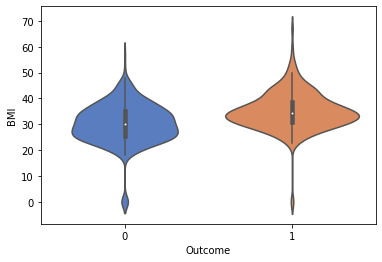

In [10]:
ax = sns.violinplot(x='Outcome', y='BMI', data=dataset, palette='muted', split=False)

In [11]:
df1 = dataset.loc[dataset['Outcome'] == 1]
df2 = dataset.loc[dataset['Outcome'] == 0]
df1 = df1.replace({'BMI':0}, np.median(df1['BMI']))
df2 = df2.replace({'BMI':0}, np.median(df2['BMI']))
dataframe = [df1, df2]
dataset = pd.concat(dataframe)

## 3.1.3 Diabetes Pedigree Function

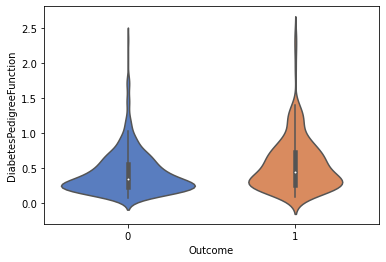

In [12]:
ax = sns.violinplot(x='Outcome', y='DiabetesPedigreeFunction', data=dataset, palette='muted', split=False)

In [13]:
df1 = dataset.loc[dataset['Outcome'] == 1]
df2 = dataset.loc[dataset['Outcome'] == 0]
df1 = df1.replace({'DiabetesPedigreeFunction':0}, np.median(df1['DiabetesPedigreeFunction']))
df2 = df2.replace({'DiabetesPedigreeFunction':0}, np.median(df2['DiabetesPedigreeFunction']))
dataframe = [df1, df2]
dataset = pd.concat(dataframe)

## 3.1.4 Glucose

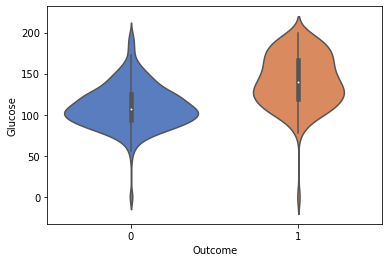

In [14]:
ax = sns.violinplot(x='Outcome', y='Glucose', data=dataset, palette='muted', split=False)

In [15]:
df1 = dataset.loc[dataset['Outcome'] == 1]
df2 = dataset.loc[dataset['Outcome'] == 0]
df1 = df1.replace({'Glucose':0}, np.median(df1['Glucose']))
df2 = df2.replace({'Glucose':0}, np.median(df2['Glucose']))
dataframe = [df1, df2]
dataset = pd.concat(dataframe)

## 3.1.5 Insulin

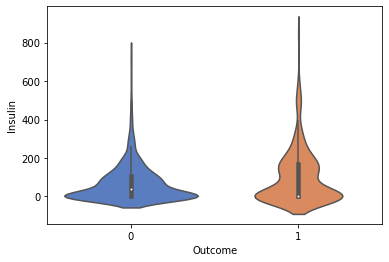

In [16]:
ax = sns.violinplot(x='Outcome', y='Insulin', data=dataset, palette='muted', split=False)

In [17]:
df1 = dataset.loc[dataset['Outcome'] == 1]
df2 = dataset.loc[dataset['Outcome'] == 0]
df1 = df1.replace({'Insulin':0}, np.median(df1['Insulin']))
df2 = df2.replace({'Insulin':0}, np.median(df2['Insulin']))
dataframe = [df1, df2]
dataset = pd.concat(dataframe)

## 3.1.6 Pregnancies

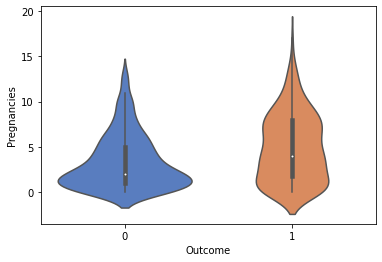

In [18]:
ax = sns.violinplot(x='Outcome', y='Pregnancies', data=dataset, palette='muted', split=False)

In [19]:
df1 = dataset.loc[dataset['Outcome'] == 1]
df2 = dataset.loc[dataset['Outcome'] == 0]
df1 = df1.replace({'Pregnancies':0}, np.median(df1['Pregnancies']))
df2 = df2.replace({'Pregnancies':0}, np.median(df2['Pregnancies']))
dataframe = [df1, df2]
dataset = pd.concat(dataframe)

## 3.1.7 Skin Thickness 

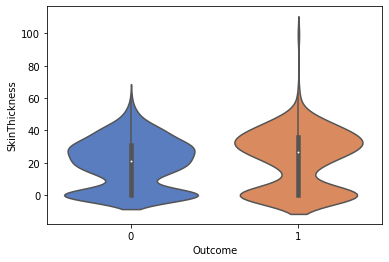

In [20]:
ax = sns.violinplot(x='Outcome', y='SkinThickness', data=dataset, palette='muted', split=False)

In [21]:
df1 = dataset.loc[dataset['Outcome'] == 1]
df2 = dataset.loc[dataset['Outcome'] == 0]
df1 = df1.replace({'SkinThickness':0}, np.median(df1['SkinThickness']))
df2 = df2.replace({'SkinThickness':0}, np.median(df2['SkinThickness']))
dataframe = [df1, df2]
dataset = pd.concat(dataframe)

## 3.1.8 Age 

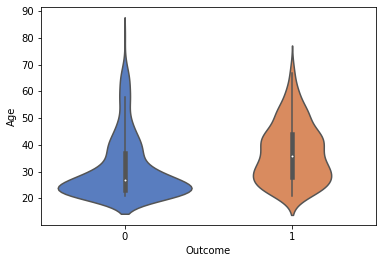

In [22]:
ax = sns.violinplot(x='Outcome', y='Age', data=dataset, palette='muted', split=False)

Fortunately, we do not have missing (zero) values in Age.

## 3.2 Collinearity

According to data visualization and pearson's method, the highest correlation is between Age and Pregnancies.

In [23]:
from scipy.stats import pearsonr
corr, _ = pearsonr(dataset['Age'], dataset['Pregnancies'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.541


Since the value is 0.541, therefore no significant multi-collinearity is observed. Hence, we go on!

## 3.3 Outliers and Non-Normality

In [24]:
#Splitting the data into dependent and independent variables
Y = dataset.Outcome
x = dataset.drop('Outcome', axis = 1)
columns = x.columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(x)
data_x = pd.DataFrame(X, columns = columns)

The 8 dependent values are now scaled!

# 4. Data Mining

## 4.1 Split data into trainset and testset

In [25]:
#Splitting the data into training and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_x, Y, test_size = 0.15, random_state = 45)

# 4.2 Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.76


In [27]:
print('Classification report:\n', classification_report(y_test, y_pred))

Classification report:
               precision    recall  f1-score   support

           0       0.74      0.91      0.82        70
           1       0.80      0.52      0.63        46

    accuracy                           0.76       116
   macro avg       0.77      0.72      0.73       116
weighted avg       0.77      0.76      0.75       116



# 4.3 Support Vector Machine

In [28]:
from sklearn.svm import SVC
classifier_rbf = SVC(kernel = 'rbf')
classifier_rbf.fit(x_train, y_train)
y_pred = classifier_rbf.predict(x_test)
print('Accuracy of SVC (RBF) classifier on test set: {:.2f}'.format(classifier_rbf.score(x_test, y_test)))

Accuracy of SVC (RBF) classifier on test set: 0.78


In [29]:
print('Classification report:\n', classification_report(y_test, y_pred))

Classification report:
               precision    recall  f1-score   support

           0       0.80      0.86      0.83        70
           1       0.76      0.67      0.71        46

    accuracy                           0.78       116
   macro avg       0.78      0.77      0.77       116
weighted avg       0.78      0.78      0.78       116



# 4.4 Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=300, bootstrap = True, max_features = 'sqrt')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('Accuracy of Random Forest on test set: {:.2f}'.format(model.score(x_test, y_test)))

Accuracy of Random Forest on test set: 0.88


In [31]:
print('Classification report:\n', classification_report(y_test, y_pred))

Classification report:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91        70
           1       0.92      0.76      0.83        46

    accuracy                           0.88       116
   macro avg       0.89      0.86      0.87       116
weighted avg       0.88      0.88      0.88       116



# 4.5 Neural Network

In [50]:
from tensorflow.keras import layers, models, optimizers, regularizers, callbacks, initializers

In [33]:
counts = np.bincount(y_train[:])
print(
    "Number of positive samples in training data: {} ({:.2f}% of total)".format(
        counts[1], 100 * float(counts[1]) / len(y_train)
    )
)

weight_for_0 = 1.0 / counts[0]
weight_for_1 = 1.0 / counts[1]

Number of positive samples in training data: 222 (34.05% of total)


In [34]:
print(x_train.shape)

(652, 8)


In [35]:
def adapt_learning_rate(epoch):
    return 0.05 / np.sqrt(epoch+1)

nn = models.Sequential([
    layers.Flatten(input_shape=([x_train.shape[1]])),
    layers.Dense(50, activation='relu',
                kernel_regularizer=regularizers.l1(1e-5), bias_regularizer=regularizers.l1(1e-5)),
    layers.Dense(50, activation='relu',
                 kernel_regularizer=regularizers.l1(1e-5), bias_regularizer=regularizers.l1(1e-5)),
    layers.Dense(1, activation='sigmoid',
                kernel_regularizer=regularizers.l1(1e-5), bias_regularizer=regularizers.l1(1e-5))
])

opt = optimizers.Adam()
nn.compile(optimizer=opt,
          loss='binary_crossentropy',
          metrics=['accuracy'])

my_lr_scheduler = callbacks.LearningRateScheduler(adapt_learning_rate)

class_weight = {0: weight_for_0, 1: weight_for_1}

history = nn.fit(x_train, y_train, epochs=100, class_weight=class_weight, validation_data=(x_test, y_test),
                callbacks=[my_lr_scheduler])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 652 samples, validate on 116 samples
Epoch 1/100
652/652 [==============================] - 0s 654us/sample - loss: 0.0035 - acc: 0.7561 - val_loss: 0.4571 - val_acc: 0.7931
Epoch 2/100
652/652 [==============================] - 0s 60us/sample - loss: 0.0022 - acc: 0.7669 - val_loss: 0.4598 - val_acc: 0.7672
Epoch 3/100
652/652 [==============================] - 0s 76us/sample - loss: 0.0018 - acc: 0.7960 - val_loss: 0.4413 - val_acc: 0.7931
Epoch 4/100
652/652 [==============================] - 0s 73us/sample - loss: 0.0017 - acc: 0.8037 - val_loss: 0.4422 - val_acc: 0.8103
Epoch 5/100
652/652 [==============================] - 0s 75us/sample - loss: 0.0015 - acc: 0.8160 - val_loss: 0.4066 - val_acc: 0.8017
Epoch 6/100
652/652 [==============================] - 0s 75u

Epoch 55/100
652/652 [==============================] - 0s 55us/sample - loss: 9.4659e-04 - acc: 0.9156 - val_loss: 0.2634 - val_acc: 0.8621
Epoch 56/100
652/652 [==============================] - 0s 57us/sample - loss: 9.4475e-04 - acc: 0.9172 - val_loss: 0.2537 - val_acc: 0.8793
Epoch 57/100
652/652 [==============================] - 0s 57us/sample - loss: 9.3785e-04 - acc: 0.9187 - val_loss: 0.2610 - val_acc: 0.8707
Epoch 58/100
652/652 [==============================] - 0s 58us/sample - loss: 9.4101e-04 - acc: 0.9095 - val_loss: 0.2555 - val_acc: 0.8621
Epoch 59/100
652/652 [==============================] - 0s 58us/sample - loss: 9.3778e-04 - acc: 0.9126 - val_loss: 0.2581 - val_acc: 0.8621
Epoch 60/100
652/652 [==============================] - 0s 57us/sample - loss: 9.4462e-04 - acc: 0.9141 - val_loss: 0.2536 - val_acc: 0.8793
Epoch 61/100
652/652 [==============================] - 0s 61us/sample - loss: 9.3723e-04 - acc: 0.9202 - val_loss: 0.2713 - val_acc: 0.8534
Epoch 62/100


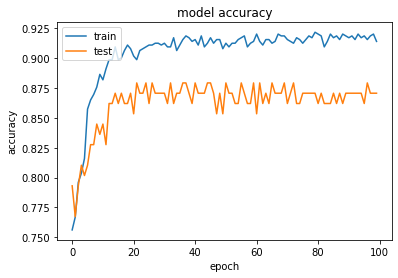

In [36]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [37]:
y_pred = nn.predict(x_test)
y_pred_classes = np.where(y_pred > 0.5, 1, 0)
#print(y_pred_classes)
print('Classification report:\n', classification_report(y_test, y_pred_classes))

Classification report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.90        70
           1       0.86      0.80      0.83        46

    accuracy                           0.87       116
   macro avg       0.87      0.86      0.86       116
weighted avg       0.87      0.87      0.87       116



## 4.6 Imporving NN

In [38]:
def adapt_learning_rate(epoch):
    return 0.05 / np.sqrt(epoch+1)

nn = models.Sequential([
    layers.Flatten(input_shape=([x_train.shape[1]])),
    layers.Dense(100, activation='relu',
                kernel_regularizer=regularizers.l1(1e-4), bias_regularizer=regularizers.l1(1e-4)),
    layers.Dense(100, activation='relu',
                 kernel_regularizer=regularizers.l1(1e-6), bias_regularizer=regularizers.l1(1e-6)),
    layers.Dense(1, activation='sigmoid',
                kernel_regularizer=regularizers.l1(1e-5), bias_regularizer=regularizers.l1(1e-5))
])

opt = optimizers.Adam()
nn.compile(optimizer=opt,
          loss='binary_crossentropy',
          metrics=['accuracy'])

my_lr_scheduler = callbacks.LearningRateScheduler(adapt_learning_rate)

class_weight = {0: weight_for_0, 1: weight_for_1}

history = nn.fit(x_train, y_train, epochs=150, class_weight=class_weight, validation_data=(x_test, y_test),
                callbacks=[my_lr_scheduler])

Train on 652 samples, validate on 116 samples
Epoch 1/150
652/652 [==============================] - 0s 563us/sample - loss: 0.0059 - acc: 0.7040 - val_loss: 0.6014 - val_acc: 0.7069
Epoch 2/150
652/652 [==============================] - 0s 69us/sample - loss: 0.0036 - acc: 0.6948 - val_loss: 0.4669 - val_acc: 0.7672
Epoch 3/150
652/652 [==============================] - 0s 83us/sample - loss: 0.0026 - acc: 0.7868 - val_loss: 0.4161 - val_acc: 0.8448
Epoch 4/150
652/652 [==============================] - 0s 73us/sample - loss: 0.0022 - acc: 0.7883 - val_loss: 0.4579 - val_acc: 0.7672
Epoch 5/150
652/652 [==============================] - 0s 81us/sample - loss: 0.0020 - acc: 0.8252 - val_loss: 0.4368 - val_acc: 0.8017
Epoch 6/150
652/652 [==============================] - 0s 73us/sample - loss: 0.0018 - acc: 0.8221 - val_loss: 0.4029 - val_acc: 0.8017
Epoch 7/150
652/652 [==============================] - 0s 69us/sample - loss: 0.0017 - acc: 0.8558 - val_loss: 0.4134 - val_acc: 0.8017
E

Epoch 120/150
652/652 [==============================] - 0s 66us/sample - loss: 0.0012 - acc: 0.9034 - val_loss: 0.2495 - val_acc: 0.8879
Epoch 121/150
652/652 [==============================] - 0s 133us/sample - loss: 0.0011 - acc: 0.9095 - val_loss: 0.2628 - val_acc: 0.8793
Epoch 122/150
652/652 [==============================] - 0s 76us/sample - loss: 0.0012 - acc: 0.9095 - val_loss: 0.2745 - val_acc: 0.8707
Epoch 123/150
652/652 [==============================] - 0s 73us/sample - loss: 0.0012 - acc: 0.8926 - val_loss: 0.2458 - val_acc: 0.8966
Epoch 124/150
652/652 [==============================] - 0s 80us/sample - loss: 0.0011 - acc: 0.9049 - val_loss: 0.2625 - val_acc: 0.8707
Epoch 125/150
652/652 [==============================] - 0s 78us/sample - loss: 0.0012 - acc: 0.8911 - val_loss: 0.2512 - val_acc: 0.8879
Epoch 126/150
652/652 [==============================] - 0s 69us/sample - loss: 0.0011 - acc: 0.9034 - val_loss: 0.2485 - val_acc: 0.8879
Epoch 127/150
652/652 [==========

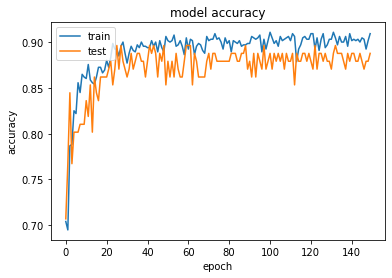

In [39]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [40]:
y_pred = nn.predict(x_test)
y_pred_classes = np.where(y_pred > 0.5, 1, 0)
#print(y_pred_classes)
print('Classification report:\n', classification_report(y_test, y_pred_classes))

Classification report:
               precision    recall  f1-score   support

           0       0.93      0.89      0.91        70
           1       0.84      0.89      0.86        46

    accuracy                           0.89       116
   macro avg       0.88      0.89      0.88       116
weighted avg       0.89      0.89      0.89       116



In [41]:
def adapt_learning_rate(epoch):
    return 0.5 / np.sqrt(epoch+1)

nn = models.Sequential([
    layers.Flatten(input_shape=([x_train.shape[1]])),
    layers.Dense(100, activation='relu',
                kernel_regularizer=regularizers.l1(1e-5), bias_regularizer=regularizers.l1(1e-5)),
    layers.Dense(100, activation='relu',
                 kernel_regularizer=regularizers.l1(1e-6), bias_regularizer=regularizers.l1(1e-6)),
    layers.Dense(1, activation='sigmoid',
                kernel_regularizer=regularizers.l1(1e-5), bias_regularizer=regularizers.l1(1e-5))
])

opt = optimizers.Adam()
nn.compile(optimizer=opt,
          loss='binary_crossentropy',
          metrics=['accuracy'])

my_lr_scheduler = callbacks.LearningRateScheduler(adapt_learning_rate)

class_weight = {0: weight_for_0, 1: weight_for_1}

history = nn.fit(x_train, y_train, epochs=300, class_weight=class_weight, validation_data=(x_test, y_test),
                callbacks=[my_lr_scheduler])

Train on 652 samples, validate on 116 samples
Epoch 1/300
652/652 [==============================] - 0s 592us/sample - loss: 0.1473 - acc: 0.6350 - val_loss: 11.7182 - val_acc: 0.5345
Epoch 2/300
652/652 [==============================] - 0s 78us/sample - loss: 0.0499 - acc: 0.7316 - val_loss: 1.0179 - val_acc: 0.7069
Epoch 3/300
652/652 [==============================] - 0s 75us/sample - loss: 0.0353 - acc: 0.6549 - val_loss: 0.7628 - val_acc: 0.6810
Epoch 4/300
652/652 [==============================] - 0s 76us/sample - loss: 0.0329 - acc: 0.7301 - val_loss: 0.7181 - val_acc: 0.6810
Epoch 5/300
652/652 [==============================] - 0s 84us/sample - loss: 0.0307 - acc: 0.7270 - val_loss: 0.7734 - val_acc: 0.6724
Epoch 6/300
652/652 [==============================] - 0s 79us/sample - loss: 0.0288 - acc: 0.7209 - val_loss: 0.7312 - val_acc: 0.6724
Epoch 7/300
652/652 [==============================] - 0s 76us/sample - loss: 0.0271 - acc: 0.7439 - val_loss: 0.6989 - val_acc: 0.6897


652/652 [==============================] - 0s 72us/sample - loss: 0.0010 - acc: 0.9156 - val_loss: 0.2794 - val_acc: 0.8707
Epoch 120/300
652/652 [==============================] - 0s 66us/sample - loss: 9.9511e-04 - acc: 0.9126 - val_loss: 0.2604 - val_acc: 0.8879
Epoch 121/300
652/652 [==============================] - 0s 64us/sample - loss: 9.8405e-04 - acc: 0.9141 - val_loss: 0.2733 - val_acc: 0.8621
Epoch 122/300
652/652 [==============================] - 0s 75us/sample - loss: 0.0010 - acc: 0.9049 - val_loss: 0.2817 - val_acc: 0.8621
Epoch 123/300
652/652 [==============================] - 0s 66us/sample - loss: 0.0011 - acc: 0.9095 - val_loss: 0.2674 - val_acc: 0.8793
Epoch 124/300
652/652 [==============================] - 0s 77us/sample - loss: 0.0010 - acc: 0.9095 - val_loss: 0.2787 - val_acc: 0.8707
Epoch 125/300
652/652 [==============================] - 0s 63us/sample - loss: 0.0010 - acc: 0.9064 - val_loss: 0.4212 - val_acc: 0.8276
Epoch 126/300
652/652 [=================

652/652 [==============================] - 0s 75us/sample - loss: 9.1830e-04 - acc: 0.9141 - val_loss: 0.2724 - val_acc: 0.8621
Epoch 178/300
652/652 [==============================] - 0s 73us/sample - loss: 0.0011 - acc: 0.8988 - val_loss: 0.3318 - val_acc: 0.8707
Epoch 179/300
652/652 [==============================] - 0s 77us/sample - loss: 9.2728e-04 - acc: 0.9110 - val_loss: 0.3088 - val_acc: 0.8534
Epoch 180/300
652/652 [==============================] - 0s 69us/sample - loss: 9.2062e-04 - acc: 0.9156 - val_loss: 0.2820 - val_acc: 0.8621
Epoch 181/300
652/652 [==============================] - 0s 84us/sample - loss: 9.3221e-04 - acc: 0.9126 - val_loss: 0.2691 - val_acc: 0.8793
Epoch 182/300
652/652 [==============================] - 0s 73us/sample - loss: 9.1077e-04 - acc: 0.9141 - val_loss: 0.2967 - val_acc: 0.8621
Epoch 183/300
652/652 [==============================] - 0s 73us/sample - loss: 9.1116e-04 - acc: 0.9110 - val_loss: 0.2942 - val_acc: 0.8534
Epoch 184/300
652/652 [=

Epoch 235/300
652/652 [==============================] - 0s 75us/sample - loss: 8.7479e-04 - acc: 0.9187 - val_loss: 0.2867 - val_acc: 0.8707
Epoch 236/300
652/652 [==============================] - 0s 73us/sample - loss: 8.6257e-04 - acc: 0.9187 - val_loss: 0.3038 - val_acc: 0.8534
Epoch 237/300
652/652 [==============================] - 0s 72us/sample - loss: 8.8003e-04 - acc: 0.9264 - val_loss: 0.2822 - val_acc: 0.8707
Epoch 238/300
652/652 [==============================] - 0s 74us/sample - loss: 8.6176e-04 - acc: 0.9202 - val_loss: 0.2771 - val_acc: 0.8879
Epoch 239/300
652/652 [==============================] - 0s 86us/sample - loss: 8.5011e-04 - acc: 0.9187 - val_loss: 0.2717 - val_acc: 0.8793
Epoch 240/300
652/652 [==============================] - 0s 75us/sample - loss: 8.6967e-04 - acc: 0.9264 - val_loss: 0.2867 - val_acc: 0.8621
Epoch 241/300
652/652 [==============================] - 0s 78us/sample - loss: 8.8683e-04 - acc: 0.9110 - val_loss: 0.2870 - val_acc: 0.8621
Epoch 

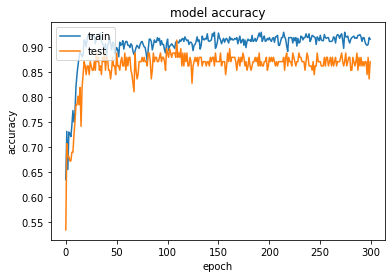

In [42]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [43]:
y_pred = nn.predict(x_test)
y_pred_classes = np.where(y_pred > 0.5, 1, 0)
#print(y_pred_classes)
print('Classification report:\n', classification_report(y_test, y_pred_classes))

Classification report:
               precision    recall  f1-score   support

           0       0.91      0.87      0.89        70
           1       0.82      0.87      0.84        46

    accuracy                           0.87       116
   macro avg       0.86      0.87      0.87       116
weighted avg       0.87      0.87      0.87       116



In [44]:
def adapt_learning_rate(epoch):
    return 0.05 / (epoch**(0.2)+1)

nn = models.Sequential([
    layers.Flatten(input_shape=([x_train.shape[1]])),
    layers.Dense(100, activation='relu',
                kernel_regularizer=regularizers.l1(1e-5), bias_regularizer=regularizers.l1(1e-5)),
    layers.Dense(100, activation='relu',
                 kernel_regularizer=regularizers.l1(1e-6), bias_regularizer=regularizers.l1(1e-6)),
    layers.Dense(1, activation='sigmoid',
                kernel_regularizer=regularizers.l1(1e-5), bias_regularizer=regularizers.l1(1e-5))
])

opt = optimizers.Adam()
nn.compile(optimizer=opt,
          loss='binary_crossentropy',
          metrics=['accuracy'])

my_lr_scheduler = callbacks.LearningRateScheduler(adapt_learning_rate)

class_weight = {0: weight_for_0, 1: weight_for_1}

history = nn.fit(x_train, y_train, epochs=300, class_weight=class_weight, validation_data=(x_test, y_test),
                callbacks=[my_lr_scheduler])

Train on 652 samples, validate on 116 samples
Epoch 1/300
652/652 [==============================] - 0s 631us/sample - loss: 0.0034 - acc: 0.6672 - val_loss: 0.4966 - val_acc: 0.7672
Epoch 2/300
652/652 [==============================] - 0s 61us/sample - loss: 0.0026 - acc: 0.7960 - val_loss: 0.4485 - val_acc: 0.8017
Epoch 3/300
652/652 [==============================] - 0s 58us/sample - loss: 0.0020 - acc: 0.7991 - val_loss: 0.4549 - val_acc: 0.7931
Epoch 4/300
652/652 [==============================] - 0s 59us/sample - loss: 0.0017 - acc: 0.8252 - val_loss: 0.4325 - val_acc: 0.8017
Epoch 5/300
652/652 [==============================] - 0s 62us/sample - loss: 0.0016 - acc: 0.8221 - val_loss: 0.3983 - val_acc: 0.8190
Epoch 6/300
652/652 [==============================] - 0s 58us/sample - loss: 0.0015 - acc: 0.8558 - val_loss: 0.4094 - val_acc: 0.8190
Epoch 7/300
652/652 [==============================] - 0s 57us/sample - loss: 0.0014 - acc: 0.8620 - val_loss: 0.3620 - val_acc: 0.8190
E

Epoch 117/300
652/652 [==============================] - 0s 83us/sample - loss: 9.3429e-04 - acc: 0.9141 - val_loss: 0.2468 - val_acc: 0.8879
Epoch 118/300
652/652 [==============================] - 0s 64us/sample - loss: 9.1326e-04 - acc: 0.9233 - val_loss: 0.2485 - val_acc: 0.8707
Epoch 119/300
652/652 [==============================] - 0s 69us/sample - loss: 8.6402e-04 - acc: 0.9310 - val_loss: 0.2376 - val_acc: 0.8793
Epoch 120/300
652/652 [==============================] - 0s 75us/sample - loss: 8.5505e-04 - acc: 0.9279 - val_loss: 0.2453 - val_acc: 0.8793
Epoch 121/300
652/652 [==============================] - 0s 61us/sample - loss: 8.4740e-04 - acc: 0.9248 - val_loss: 0.2408 - val_acc: 0.8793
Epoch 122/300
652/652 [==============================] - 0s 66us/sample - loss: 8.3867e-04 - acc: 0.9310 - val_loss: 0.2444 - val_acc: 0.8879
Epoch 123/300
652/652 [==============================] - 0s 57us/sample - loss: 8.5423e-04 - acc: 0.9264 - val_loss: 0.2456 - val_acc: 0.8793
Epoch 

652/652 [==============================] - 0s 57us/sample - loss: 8.0515e-04 - acc: 0.9264 - val_loss: 0.2499 - val_acc: 0.8707
Epoch 232/300
652/652 [==============================] - 0s 58us/sample - loss: 7.8008e-04 - acc: 0.9325 - val_loss: 0.2465 - val_acc: 0.8879
Epoch 233/300
652/652 [==============================] - 0s 55us/sample - loss: 7.7920e-04 - acc: 0.9340 - val_loss: 0.2438 - val_acc: 0.8966
Epoch 234/300
652/652 [==============================] - 0s 56us/sample - loss: 7.7358e-04 - acc: 0.9356 - val_loss: 0.2506 - val_acc: 0.8879
Epoch 235/300
652/652 [==============================] - 0s 55us/sample - loss: 7.7491e-04 - acc: 0.9356 - val_loss: 0.2600 - val_acc: 0.8879
Epoch 236/300
652/652 [==============================] - 0s 58us/sample - loss: 7.8568e-04 - acc: 0.9294 - val_loss: 0.2767 - val_acc: 0.8793
Epoch 237/300
652/652 [==============================] - 0s 57us/sample - loss: 8.4835e-04 - acc: 0.9279 - val_loss: 0.2568 - val_acc: 0.8793
Epoch 238/300
652/65

Epoch 289/300
652/652 [==============================] - 0s 69us/sample - loss: 7.7437e-04 - acc: 0.9294 - val_loss: 0.2352 - val_acc: 0.8793
Epoch 290/300
652/652 [==============================] - 0s 75us/sample - loss: 7.5265e-04 - acc: 0.9402 - val_loss: 0.2584 - val_acc: 0.8707
Epoch 291/300
652/652 [==============================] - 0s 73us/sample - loss: 7.7529e-04 - acc: 0.9325 - val_loss: 0.2357 - val_acc: 0.8879
Epoch 292/300
652/652 [==============================] - 0s 70us/sample - loss: 7.6468e-04 - acc: 0.9371 - val_loss: 0.2619 - val_acc: 0.8879
Epoch 293/300
652/652 [==============================] - 0s 81us/sample - loss: 7.9883e-04 - acc: 0.9264 - val_loss: 0.2881 - val_acc: 0.8793
Epoch 294/300
652/652 [==============================] - 0s 64us/sample - loss: 0.0011 - acc: 0.9018 - val_loss: 0.2404 - val_acc: 0.8879
Epoch 295/300
652/652 [==============================] - 0s 64us/sample - loss: 9.3812e-04 - acc: 0.9110 - val_loss: 0.2575 - val_acc: 0.8707
Epoch 296/

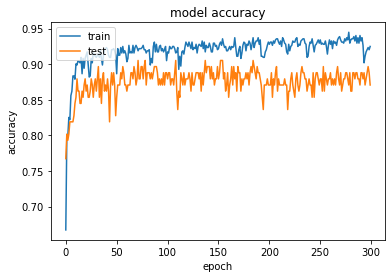

In [45]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [46]:
y_pred = nn.predict(x_test)
y_pred_classes = np.where(y_pred > 0.5, 1, 0)
#print(y_pred_classes)
print('Classification report:\n', classification_report(y_test, y_pred_classes))

Classification report:
               precision    recall  f1-score   support

           0       0.92      0.86      0.89        70
           1       0.80      0.89      0.85        46

    accuracy                           0.87       116
   macro avg       0.86      0.87      0.87       116
weighted avg       0.88      0.87      0.87       116



In [47]:
def adapt_learning_rate(epoch):
    return 0.05 / (epoch**(0.2)+1)

nn = models.Sequential([
    layers.Flatten(input_shape=([x_train.shape[1]])),
    layers.Dense(100, activation='relu',
                kernel_regularizer=regularizers.l1(1e-6), bias_regularizer=regularizers.l1(1e-6)),
    layers.Dense(100, activation='relu',
                 kernel_regularizer=regularizers.l1(1e-5), bias_regularizer=regularizers.l1(1e-5)),
    layers.Dense(1, activation='sigmoid',
                kernel_regularizer=regularizers.l1(1e-5), bias_regularizer=regularizers.l1(1e-5))
])

opt = optimizers.Adam()
nn.compile(optimizer=opt,
          loss='binary_crossentropy',
          metrics=['accuracy'])

my_lr_scheduler = callbacks.LearningRateScheduler(adapt_learning_rate)

class_weight = {0: weight_for_0, 1: weight_for_1}

history = nn.fit(x_train, y_train, epochs=300, class_weight=class_weight, validation_data=(x_test, y_test),
                callbacks=[my_lr_scheduler])

Train on 652 samples, validate on 116 samples
Epoch 1/300
652/652 [==============================] - 1s 780us/sample - loss: 0.0052 - acc: 0.7193 - val_loss: 0.4762 - val_acc: 0.7414
Epoch 2/300
652/652 [==============================] - 0s 64us/sample - loss: 0.0027 - acc: 0.7883 - val_loss: 0.4529 - val_acc: 0.7500
Epoch 3/300
652/652 [==============================] - 0s 60us/sample - loss: 0.0021 - acc: 0.7699 - val_loss: 0.4465 - val_acc: 0.7759
Epoch 4/300
652/652 [==============================] - 0s 63us/sample - loss: 0.0018 - acc: 0.7945 - val_loss: 0.4273 - val_acc: 0.8103
Epoch 5/300
652/652 [==============================] - 0s 61us/sample - loss: 0.0017 - acc: 0.8144 - val_loss: 0.4304 - val_acc: 0.8017
Epoch 6/300
652/652 [==============================] - ETA: 0s - loss: 0.0016 - acc: 0.843 - 0s 60us/sample - loss: 0.0017 - acc: 0.8344 - val_loss: 0.3846 - val_acc: 0.8448
Epoch 7/300
652/652 [==============================] - 0s 59us/sample - loss: 0.0015 - acc: 0.8620 

652/652 [==============================] - 0s 63us/sample - loss: 8.3821e-04 - acc: 0.9279 - val_loss: 0.3662 - val_acc: 0.8448
Epoch 118/300
652/652 [==============================] - 0s 59us/sample - loss: 8.2111e-04 - acc: 0.9310 - val_loss: 0.3470 - val_acc: 0.8621
Epoch 119/300
652/652 [==============================] - 0s 60us/sample - loss: 8.2212e-04 - acc: 0.9340 - val_loss: 0.3342 - val_acc: 0.8362
Epoch 120/300
652/652 [==============================] - 0s 64us/sample - loss: 8.2663e-04 - acc: 0.9279 - val_loss: 0.3546 - val_acc: 0.8534
Epoch 121/300
652/652 [==============================] - 0s 135us/sample - loss: 8.1585e-04 - acc: 0.9371 - val_loss: 0.3729 - val_acc: 0.8707
Epoch 122/300
652/652 [==============================] - 0s 130us/sample - loss: 8.4721e-04 - acc: 0.9294 - val_loss: 0.3529 - val_acc: 0.8534
Epoch 123/300
652/652 [==============================] - 0s 83us/sample - loss: 8.8061e-04 - acc: 0.9279 - val_loss: 0.4076 - val_acc: 0.8534
Epoch 124/300
652/

Epoch 232/300
652/652 [==============================] - 0s 58us/sample - loss: 7.7961e-04 - acc: 0.9356 - val_loss: 0.3386 - val_acc: 0.8621
Epoch 233/300
652/652 [==============================] - 0s 58us/sample - loss: 7.7269e-04 - acc: 0.9340 - val_loss: 0.3683 - val_acc: 0.8621
Epoch 234/300
652/652 [==============================] - 0s 59us/sample - loss: 7.7165e-04 - acc: 0.9340 - val_loss: 0.3774 - val_acc: 0.8534
Epoch 235/300
652/652 [==============================] - 0s 56us/sample - loss: 7.8985e-04 - acc: 0.9264 - val_loss: 0.3447 - val_acc: 0.8621
Epoch 236/300
652/652 [==============================] - 0s 61us/sample - loss: 7.9800e-04 - acc: 0.9325 - val_loss: 0.3597 - val_acc: 0.8621
Epoch 237/300
652/652 [==============================] - 0s 58us/sample - loss: 7.9813e-04 - acc: 0.9402 - val_loss: 0.4164 - val_acc: 0.8534
Epoch 238/300
652/652 [==============================] - 0s 58us/sample - loss: 7.7586e-04 - acc: 0.9371 - val_loss: 0.3486 - val_acc: 0.8707
Epoch 

Epoch 290/300
652/652 [==============================] - 0s 62us/sample - loss: 7.7882e-04 - acc: 0.9402 - val_loss: 0.3820 - val_acc: 0.8879
Epoch 291/300
652/652 [==============================] - 0s 63us/sample - loss: 7.7740e-04 - acc: 0.9294 - val_loss: 0.3642 - val_acc: 0.8793
Epoch 292/300
652/652 [==============================] - 0s 69us/sample - loss: 8.6771e-04 - acc: 0.9080 - val_loss: 0.3180 - val_acc: 0.8448
Epoch 293/300
652/652 [==============================] - 0s 62us/sample - loss: 8.1713e-04 - acc: 0.9279 - val_loss: 0.3412 - val_acc: 0.8793
Epoch 294/300
652/652 [==============================] - 0s 64us/sample - loss: 7.7845e-04 - acc: 0.9448 - val_loss: 0.3641 - val_acc: 0.8621
Epoch 295/300
652/652 [==============================] - 0s 58us/sample - loss: 7.6817e-04 - acc: 0.9387 - val_loss: 0.3704 - val_acc: 0.8534
Epoch 296/300
652/652 [==============================] - 0s 67us/sample - loss: 7.8328e-04 - acc: 0.9356 - val_loss: 0.3940 - val_acc: 0.8621
Epoch 

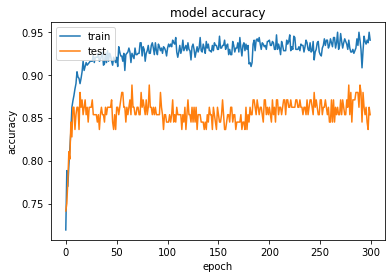

In [48]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [49]:
y_pred = nn.predict(x_test)
y_pred_classes = np.where(y_pred > 0.5, 1, 0)
#print(y_pred_classes)
print('Classification report:\n', classification_report(y_test, y_pred_classes))

Classification report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.88        70
           1       0.81      0.83      0.82        46

    accuracy                           0.85       116
   macro avg       0.85      0.85      0.85       116
weighted avg       0.85      0.85      0.85       116

